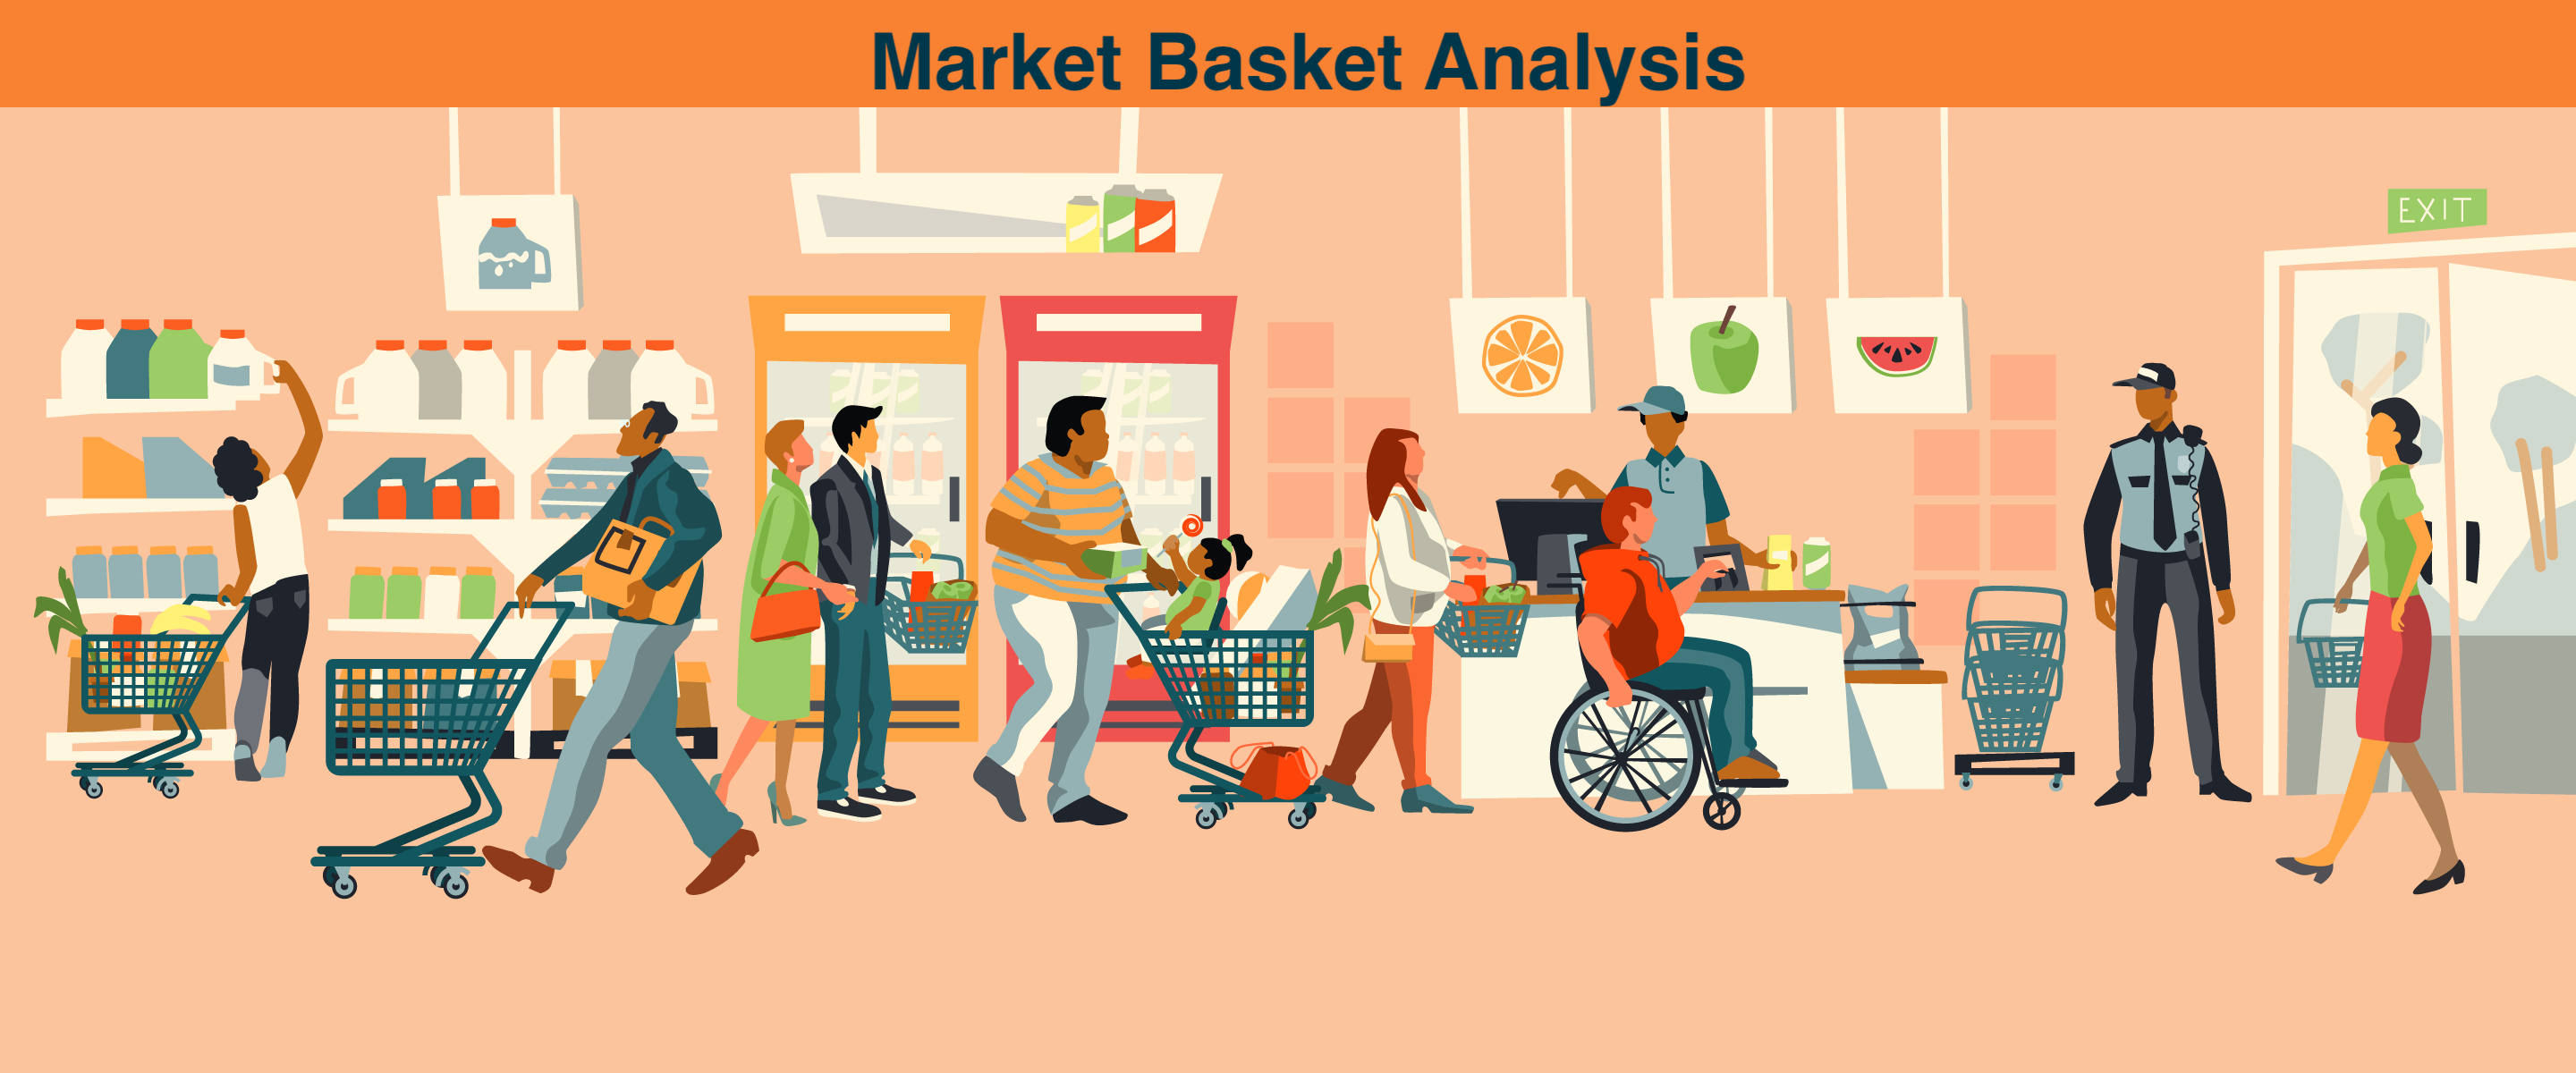

Association rules is an unsupervised learning technique which aims to describe and discover regularities between items in transaction data.

It is often used in basket analysis in sales to check if there are some general patterns in customers behaviour.

If customer buys X, he also tends to buy Y

This is the statement that advice the sale department to improve knowledge of customers’ behavior.

The main goal of this analysis is to perform most common algorithm used to observe interesting patterns between consumer’s purchases.

## Implementing Market Basket Analysis

* First, define the minimum support and confidence for the association rule.
* Find out all the subsets in the transactions with higher support(sup) than the minimum support.
* Find all the rules for these subsets with higher confidence than minimum confidence.
* Sort these association rules in decreasing order.
* Analyze the rules along with their confidence and support.

## Advantages of Market Basket Analysis

There are many advantages to implementing Market Basket Analysis in marketing. Market basket Analysis(MBA) can be applied to data of customers from the point of sale (PoS) systems.

It helps retailers with:

* Increases customer engagement
* Boosting sales and increasing RoI
* Improving customer experience
* Optimize marketing strategies and campaigns
* Help to understand customers better
* Identifies customer behavior and pattern

## Other Application Areas

Although Market Basket Analysis conjures up pictures of shopping carts and supermarket shoppers, it is important to realize that there are many other areas in which it can be applied. These include:

* Analysis of credit card purchases. 
* Analysis of telephone calling patterns. 
* Identification of fraudulent medical insurance claims. 
(Consider cases where common rules are broken).  
* Analysis of telecom service purchases. Note that despite the terminology, there is no requirement for all the items to be purchased at the same time. 
* The algorithms can be adapted to look at a sequence of purchases (or events) spread out over time. 
* A predictive market basket analysis can be used to identify sets of item purchases (or events) that generally occur in sequence — something of interest to direct marketers, criminologists and many others.

## Data Set

The data used in this project contains information about Customers buying different grocery items at a Mall and you can find it on kaggle: https://www.https://www.kaggle.com/sivaram1987/association-rule-learningapriori?select=Market_Basket_Optimisation.csv

As the summary output shows, there are 7500 transactions and 119 products.

* Market Basket Analysis using the Apriori method

Python provides the apyori as an API that is required to be imported to run the Apriori Algorithm.

In [1]:
! pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=9a458a6e10782958dad78e431772c6a3b372cf9ac72a5aeb4e9140a7a24e1b29
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori

In [ ]:
st_df=pd.read_csv("store_data.csv",header=None)
st_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we are required to get the list of items in every transaction. 

* So we are going to run two loops. One will be for the total number of transactions, and the other will be for the total number of columns in every transaction. 

* The list will work as a training set from where we can generate the list of Association Rules.

In [ ]:
#converting dataframe into list of lists
l=[]
for i in range(1,7501):
    l.append([str(st_df.values[i,j]) for j in range(0,20)])

* So we are ready with the list of items in our training set then we need to run the apriori algorithm which will learn the list of association rules from the training set i.e list. 
* So, the minimum support here will be  0.0045 which is taken here as support. * Now let us see that we have kept 0.2 as the min confidence. 
* The minimum lift =3 is taken and the minimum length is considered as 2 because we have to find an association among a minimum of two items.
* we have generated the list of association rules between the items. 

In [ ]:
#applying apriori algorithm
association_rules = apriori(l, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

So to see these rules, the below line of code needs to be run.

In [ ]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta'})
frozenset({'ground beef', 'herb & pepper'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'shrimp', 'pasta'})
frozenset({'nan', 'chicken', 'light cream'})
frozenset({'frozen vegetables', 'shrimp', 'chocolate'})
frozenset({'cooking oil', 'ground beef', 'spaghetti'})
frozenset({'nan', 'escalope', 'mushroom cream sauce'})
frozenset({'nan', 'escalope', 'pasta'})
frozenset({'frozen vegetables', 'ground beef', 'spaghetti'})
frozenset({'frozen vegetables', 'olive oil', 'milk'})
frozenset({'frozen vegetables', 'shrimp', 'mineral water'})
frozenset({'frozen vegetables', 'olive oil', 'spaghetti'})
frozenset({'frozen vegetables', 'shrimp', 'spaghetti'})
frozenset({'frozen vegetables', 'tomatoes', 'spaghetti'})
frozenset({'ground beef', 'spaghetti', 'grated cheese'})
frozenset({'ground beef', 'mineral water', 'herb & pepper'})


Here we are going to display Rule, Support, and lift ratio for every above association rule by using for loop.

In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
-----------------------------------------------------
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
-----------------------------------------------------
Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
-----------------------------------------------------
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
-----------------------------------------------------
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
-----------------------------------------------------
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
-----------------------------------------------